# Mutual Information Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####  Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

In [2]:
data=pd.read_csv('/Users/shailendrapatil/Fall2017/Machine Learning A-Z Template Folder/Projects/House Price Advanced Regression Techniques/train.csv')
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
numerics=['int16','int32','int64','float16','float32','float64']
numerical_vars=list(data.select_dtypes(include=numerics).columns)
data=data[numerical_vars]
data.shape

(1460, 38)

In [5]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['SalePrice'],axis=1),data['SalePrice'],
                                              test_size=0.3,
                                              random_state=0)

In [8]:
(X_train.shape,y_train.shape)

((1022, 37), (1022,))

In [9]:
(X_test.shape,y_test.shape)

((438, 37), (438,))

### We will use mutual_info_regression and SelectPercentile from sklearn 

In [10]:
from sklearn.feature_selection import mutual_info_regression,SelectPercentile

In [11]:
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


array([0.00000000e+00, 2.49065127e-01, 2.05948553e-01, 1.66579511e-01,
       5.32435247e-01, 9.82538596e-02, 3.32866493e-01, 2.38521191e-01,
       9.53229172e-02, 1.58521208e-01, 0.00000000e+00, 1.14209526e-01,
       3.86220539e-01, 3.11507523e-01, 2.21779978e-01, 3.92082712e-04,
       4.81365153e-01, 2.67842030e-02, 1.43564815e-03, 2.55387967e-01,
       7.64017161e-02, 5.88276352e-02, 3.47720535e-02, 1.83123640e-01,
       1.81756696e-01, 2.72294893e-01, 3.91199910e-01, 3.67738910e-01,
       7.72885475e-02, 1.73415071e-01, 6.04911127e-03, 5.47622357e-03,
       3.32810608e-02, 1.23846837e-03, 0.00000000e+00, 0.00000000e+00,
       2.50466102e-03])

In [12]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.532435
GrLivArea        0.481365
GarageCars       0.391200
TotalBsmtSF      0.386221
GarageArea       0.367739
YearBuilt        0.332866
1stFlrSF         0.311508
GarageYrBlt      0.272295
FullBath         0.255388
MSSubClass       0.249065
YearRemodAdd     0.238521
2ndFlrSF         0.221780
LotFrontage      0.205949
TotRmsAbvGrd     0.183124
Fireplaces       0.181757
OpenPorchSF      0.173415
LotArea          0.166580
BsmtFinSF1       0.158521
BsmtUnfSF        0.114210
OverallCond      0.098254
MasVnrArea       0.095323
WoodDeckSF       0.077289
HalfBath         0.076402
BedroomAbvGr     0.058828
KitchenAbvGr     0.034772
ScreenPorch      0.033281
BsmtFullBath     0.026784
EnclosedPorch    0.006049
3SsnPorch        0.005476
YrSold           0.002505
BsmtHalfBath     0.001436
PoolArea         0.001238
LowQualFinSF     0.000392
BsmtFinSF2       0.000000
MoSold           0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

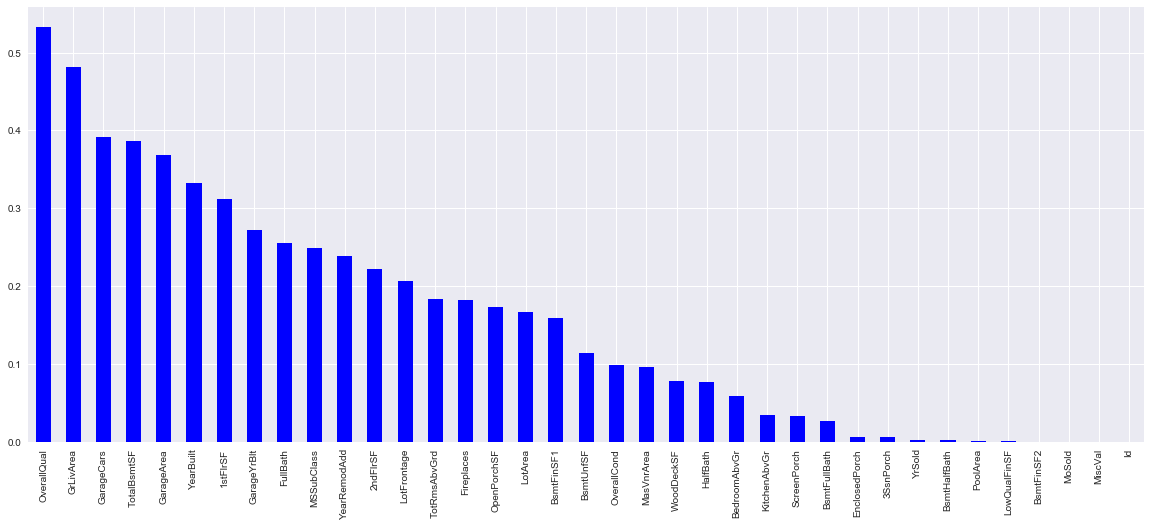

In [13]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='blue')

Now we select top 10 percentile values using SelectPercentile

In [14]:
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')